In [4]:
# ALL IN THESE HOMEWORKS, I WILL BE USING THIS CAT PICTURE TO ILLUSTRATE AS AN EXAMPLE.
!wget -N https://github.com/skaae/transformer_network/raw/master/cat.jpg

--2017-03-13 15:55:09--  https://github.com/skaae/transformer_network/raw/master/cat.jpg
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/skaae/transformer_network/master/cat.jpg [following]
--2017-03-13 15:55:10--  https://raw.githubusercontent.com/skaae/transformer_network/master/cat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227175 (222K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 221,85K   802KB/s    in 0,3s    

Last-modified header missing -- time-stamps turned off.
2017-03-13 15:55:10 (802 KB/s) - ‘cat.jpg’ saved [227175/227175]



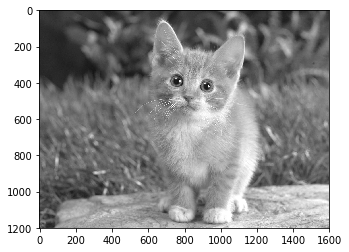

In [134]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np

# READS THE IMAGE AS GRAY SCALE
img = cv2.imread("cat.jpg", 0)

# SHOWS THE IMAGE IN GRAY SPACE
plt.imshow(img, cmap="gray")

In [189]:
# PRINTS THE DIMENSIONS
print img.shape

# IN THIS SECTION, WE WILL BE RESCALING OUR IMAGE.
# IF THIS OPERATION IS UPSCALING IN ANY OF THE DIRECTIONS (WHEN x_sc OR y_sc IS BIGGER THAN 1), 
# WE WILL BE USING BILINEAR INTERPOLATION.
# OTHERWISE, WE WILL BE USING A GENERATED KERNEL FULL OF ONES, WHICH TAKES THE AVERAGE OF THE CORRESPONDING COORDINATES.

def kernel(x):
    return np.ones((x,1), dtype=np.int8)/int(x)

def kernel2d(x,y):
    return np.ones((x,y), dtype=np.float32)/int(x*y)

def scaler(img, x_sc, y_sc):
    old_dim_y = img.shape[0]
    old_dim_x = img.shape[1]
    
    if(x_sc<1 and y_sc<1):

        # THIS WILL CONVERT THE SCALE FACTOR INTO A CONVENIENT FORMAT.
        x_sc = int(1/x_sc)
        y_sc = int(1/y_sc)

        # DIMENSIONS OF THE NEW IMAGE
        new_dim_y = int(np.ceil(old_dim_y/y_sc))    
        new_dim_x = int(np.ceil(old_dim_x/x_sc))

        new_image = np.zeros((new_dim_y, new_dim_x))

        # PRINTING THE DIMENSION OF RESCALED IMAGE
        print new_image.shape

        kernel_xy = kernel2d(x_sc,y_sc)
        kernel_xy = kernel_xy.reshape((kernel_xy.shape[0]*kernel_xy.shape[1], 1))

        strides_x = np.linspace(-new_dim_x/2, new_dim_x/2, num=old_dim_x/x_sc)
        strides_y = np.linspace(-new_dim_y/2, new_dim_y/2, num=old_dim_y/y_sc)
        print len(strides_y)

        for i in xrange(len(strides_x)-1):
            for j in xrange(len(strides_y)-1):
                print (i,j)
                new_image[i,j] = int(np.dot(img[old_dim_y/y_sc+i*y_sc:old_dim_y/y_sc+(i+1)*y_sc,old_dim_x/x_sc+j*x_sc:old_dim_x/x_sc+(j+1)*x_sc].reshape((1, x_sc*y_sc)), kernel_xy))
        
        i, j = 1,0
        new_image[i,j] = np.dot(img[old_dim_y/y_sc+i*y_sc:old_dim_y/y_sc+(i+1)*y_sc,old_dim_x/x_sc+j*x_sc:old_dim_x/x_sc+(j+1)*x_sc].reshape((1, x_sc*y_sc)), kernel_xy)

#         print type(1*img.shape[0]/y_sc)
#         print img.shape[0]/y_sc+y_sc
#         print img[old_dim_y/y_sc:1*old_dim_y/y_sc+y_sc , old_dim_x/x_sc:old_dim_x/x_sc+x_sc]
        print img[old_dim_y/y_sc:1*old_dim_y/y_sc+y_sc , old_dim_x/x_sc:old_dim_x/x_sc+x_sc].reshape((x_sc*y_sc,1)).shape
        print kernel_xy.shape
            
    
    elif(x_sc<1):
        kernel_x = kernel(1/x_sc)
    
    elif(y_sc<1):
        kernel_y = kernel(1/y_sc)
        
    return new_image

new_img = np.zeros((int(img.shape[0]*0.1), int(img.shape[1]*0.1)))
new_img = scaler(img, 0.1, 0.1)

(1200, 1600)
(120, 160)
120
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(0, 28)
(0, 29)
(0, 30)
(0, 31)
(0, 32)
(0, 33)
(0, 34)
(0, 35)
(0, 36)
(0, 37)
(0, 38)
(0, 39)
(0, 40)
(0, 41)
(0, 42)
(0, 43)
(0, 44)
(0, 45)
(0, 46)
(0, 47)
(0, 48)
(0, 49)
(0, 50)
(0, 51)
(0, 52)
(0, 53)
(0, 54)
(0, 55)
(0, 56)
(0, 57)
(0, 58)
(0, 59)
(0, 60)
(0, 61)
(0, 62)
(0, 63)
(0, 64)
(0, 65)
(0, 66)
(0, 67)
(0, 68)
(0, 69)
(0, 70)
(0, 71)
(0, 72)
(0, 73)
(0, 74)
(0, 75)
(0, 76)
(0, 77)
(0, 78)
(0, 79)
(0, 80)
(0, 81)
(0, 82)
(0, 83)
(0, 84)
(0, 85)
(0, 86)
(0, 87)
(0, 88)
(0, 89)
(0, 90)
(0, 91)
(0, 92)
(0, 93)
(0, 94)
(0, 95)
(0, 96)
(0, 97)
(0, 98)
(0, 99)
(0, 100)
(0, 101)
(0, 102)
(0, 103)
(0, 104)
(0, 105)
(0, 106)
(0, 107)
(0, 108)
(0, 109)
(0, 110)
(0, 111)
(0, 112)
(0, 113)
(0, 114)
(0, 115)
(0, 116)
(0, 117)
(0, 118)
(1, 0)
(1, 

ValueError: cannot reshape array of size 0 into shape (1,100)

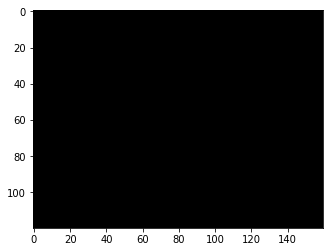

In [190]:
plt.imshow(new_img, cmap="gray")